IV.  Global Averages
------------

**Summary:**   Full-volume averages of requested output variables over the full, spherical shell

**Subdirectory:**  G_Avgs

**main_input prefix:** globalavg

**Python Class:** G_Avgs

**Additional Namelist Variables:**  
None

*Before proceeding, ensure that you have copied Rayleigh/etc/analysis/rayleigh_diagnostics.py to your simulation directory.  This Python module is required for reading Rayleigh output into Python.*

Examining the *main_input* file, we see that the following output values have been denoted for the Global Averages (see *rayleigh_output_variables.pdf* for the mathematical formulae):


| Menu Code | Description |
|-----------|-------------|
| 401       | Full Kinetic Energy Density (KE) |
| 402       | KE (radial motion) |
| 403       | KE (theta motion)  |
| 404       | KE (phi motion) |
| 405       | Mean Kinetic Energy Density (MKE) |
| 406       | MKE (radial motion) |
| 407       | MKE (theta motion) |
| 408       | MKE (phi motion) |
| 409       | Fluctuating Kinetic Energy Density (FKE) |
| 410       | FKE (radial motion) |
| 411       | FKE (theta motion) |
| 412       | FKE (phi motion) |

In the example that follows, we will plot the time-evolution of these different contributions to the kinetic energy budget.  We begin with the following preamble:

In [8]:
from rayleigh_diagnostics import G_Avgs, build_file_list
import matplotlib.pyplot as plt
import numpy


In [9]:
# Build a list of all files ranging from iteration 0 million to 1 million
files = build_file_list(0,3000000,path='G_Avgs')
print(files)

['G_Avgs/00010000', 'G_Avgs/00020000', 'G_Avgs/00030000', 'G_Avgs/00040000', 'G_Avgs/00050000', 'G_Avgs/00060000', 'G_Avgs/00070000', 'G_Avgs/00080000', 'G_Avgs/00090000', 'G_Avgs/00100000', 'G_Avgs/00110000', 'G_Avgs/00120000', 'G_Avgs/00130000', 'G_Avgs/00140000', 'G_Avgs/00150000', 'G_Avgs/00160000', 'G_Avgs/00170000', 'G_Avgs/00180000', 'G_Avgs/00190000', 'G_Avgs/00200000', 'G_Avgs/00210000', 'G_Avgs/00220000', 'G_Avgs/00230000', 'G_Avgs/00240000', 'G_Avgs/00250000', 'G_Avgs/00260000', 'G_Avgs/00270000', 'G_Avgs/00280000', 'G_Avgs/00290000', 'G_Avgs/00300000', 'G_Avgs/00310000', 'G_Avgs/00320000', 'G_Avgs/00330000', 'G_Avgs/00340000', 'G_Avgs/00350000', 'G_Avgs/00360000', 'G_Avgs/00370000', 'G_Avgs/00380000', 'G_Avgs/00390000']


In [10]:
a = G_Avgs(filename=files[0],path='')  # Here, files[0]='G_Avgs/00010000'
# a= G_Avgs(filename='00010000') would yield an equivalent result
# help(a)

Examining the docstring, we see a few important attributes that are common to the other outputs discussed in this document:
1.  niter -- the number of time steps in the file
2.  nq   -- the number of output variables stored in the file
3.  qv   -- the menu codes for those variables
4.  vals -- the actual data
5.  time -- the simulation time corresponding to each output dump

The first step in plotting a time series is to collate the data.

In [11]:
# Loop over all files and concatenate their data into a single array
nfiles = len(files)
for i,f in enumerate(files):
    a = G_Avgs(filename=f,path='')
    if (i == 0):
        nq = a.nq
        niter = a.niter
        gavgs = numpy.zeros((niter*nfiles,nq),dtype='float64')
        iters = numpy.zeros(niter*nfiles,dtype='int32')
        time = numpy.zeros(niter*nfiles,dtype='float64')
    i0 = i*niter
    i1 = (i+1)*niter
    gavgs[i0:i1,:] = a.vals
    time[i0:i1] = a.time
    iters[i0:i1] = a.iters



ValueError: could not broadcast input array from shape (51,12) into shape (100,12)

The Lookup Table (LUT)
------------------

The next step in the process is to identify where within the *gavgs* array our deisired output variables reside.  Every Rayleigh file object possesses a lookup table (lut).  The lookup table is a python list used to identify the index within the vals array where a particular menu code resides.  For instance, the menu code for the theta component of the velocity is 2.  The location of v_theta in the vals array is then stored in lut[2].  

Note that you should never assume that output variables are stored in any particular order.  Moreover, the lookup table is unique to each file and is likely to change during a run if you modify the output variables in between restarts.  When running the benchmark, we kept a consistent set of outputs throughout the entirety of the run.  This means that the lookup table did not change between outputs and that we can safely use the final file's lookup table (or any other file's table) to reference our data.

Plotting Kinetic Energy
---------------------------
Let's examine the different contributions to the kinetic energy density in our models.  Before we can plot, we should use the lookup table to identify the location of each quantity we are interested in plotting.

In [12]:
#The indices associated with our various outputs are stored in a lookup table
#as part of the GlobalAverage data structure.  We define several variables to
#hold those indices here:

lut = a.lut
ke  = lut[401]  # Kinetic Energy (KE)
rke = lut[402]  # KE associated with radial motion
tke = lut[403]  # KE associated with theta motion
pke = lut[404]  # KE associated with azimuthal motion

#We also grab some energies associated with the mean (m=0) motions
mke  = lut[405]
mrke = lut[406]  # KE associated with mean radial motion
mtke = lut[407]  # KE associated with mean theta motion
mpke = lut[408]  # KE associated with mean azimuthal motion

#We also output energies associated with the fluctuating/nonaxisymmetric
#motions (e.g., v- v_{m=0})
fke  = lut[409]
frke = lut[410]  # KE associated with mean radial motion
ftke = lut[411]  #KE associated with mean theta motion
fpke = lut[412]  # KE associated with mean azimuthal motion


To begin with, let's plot the total, mean, and fluctuating kinetic energy density during the initial transient phase, and then during the equilibrated phase.

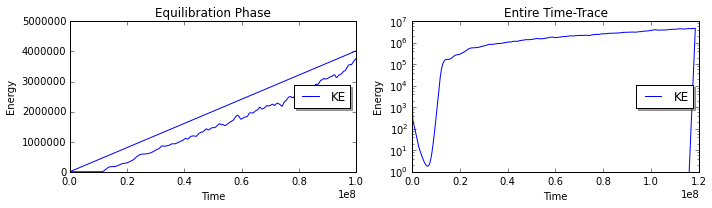

In [13]:
%matplotlib inline
sizetuple=(10,3)
fig, ax = plt.subplots(ncols=2, figsize=sizetuple)
ax[0].plot(time, gavgs[:,ke], label='KE')
# ax[0].plot(time, gavgs[:,mke],label='MKE')
# ax[0].plot(time, gavgs[:,fke], label='FKE')
ax[0].legend(loc='center right', shadow=True)
ax[0].set_xlim([0,1e8])
ax[0].set_title('Equilibration Phase')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Energy')

ax[1].plot(time, gavgs[:,ke], label='KE')
# ax[1].plot(time, gavgs[:,mke], label = 'MKE')
# ax[1].plot(time,gavgs[:,fke],label='FKE')
ax[1].legend(loc='center right', shadow=True)
ax[1].set_title('Entire Time-Trace')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Energy')
ax[1].set_yscale('log')

saveplot = False # Plots appear in the notebook and are not written to disk (set to True to save to disk)
savefile = 'energy_trace.pdf'  #Change .pdf to .png if pdf conversion gives issues
plt.tight_layout()
plt.show()

We can also look at the energy associated with each velocity component.
Note that we log scale in the last plot.  There is very little mean radial or theta kinetic energy; it is mostly phi energy.

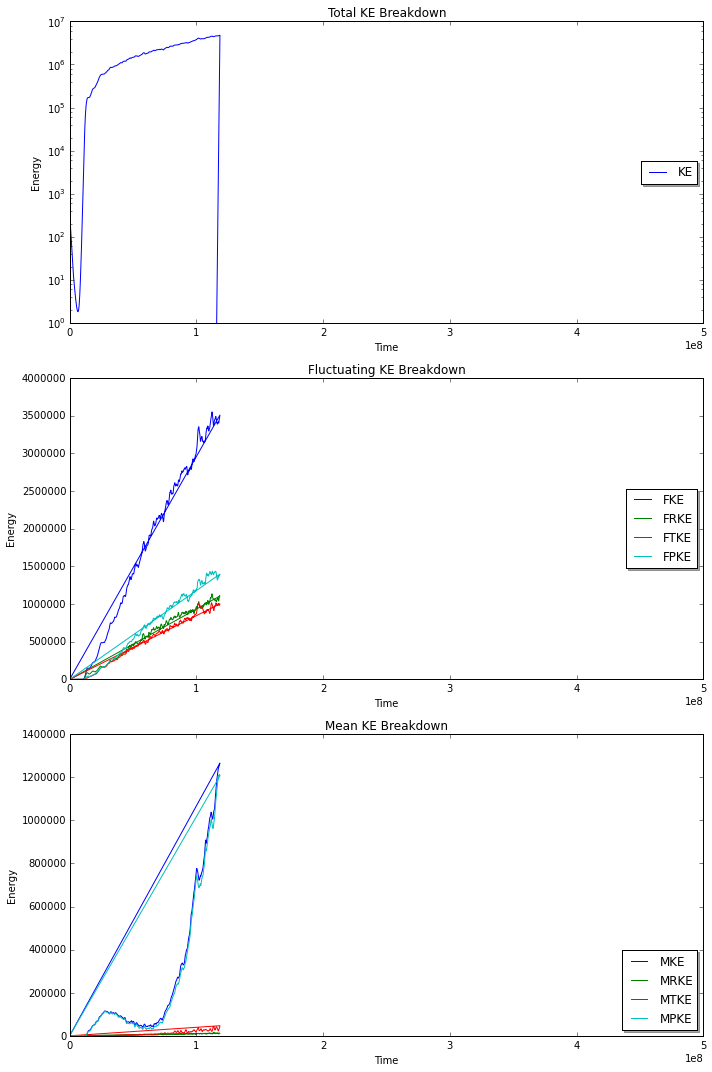

In [14]:
%matplotlib inline
sizetuple=(10,15)
xlims=[0,5e8]
fig, ax = plt.subplots(ncols=1, nrows=3, figsize=sizetuple)
ax[0].plot(time, gavgs[:,ke], label='KE')
# ax[0].plot(time, gavgs[:,rke],label='RKE')
# ax[0].plot(time, gavgs[:,tke], label='TKE')
# ax[0].plot(time, gavgs[:,pke], label='TKE')
ax[0].legend(loc='center right', shadow=True)
ax[0].set_xlim(xlims)
ax[0].set_title('Total KE Breakdown')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Energy')
ax[0].set_yscale('log')

ax[1].plot(time, gavgs[:,fke],  label='FKE')
ax[1].plot(time, gavgs[:,frke], label='FRKE')
ax[1].plot(time, gavgs[:,ftke], label='FTKE')
ax[1].plot(time, gavgs[:,fpke], label='FPKE')
ax[1].legend(loc='center right', shadow=True)
ax[1].set_xlim(xlims)
ax[1].set_title('Fluctuating KE Breakdown')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Energy')
# ax[1].set_yscale('log')

ax[2].plot(time, gavgs[:,mke],  label='MKE')
ax[2].plot(time, gavgs[:,mrke], label='MRKE')
ax[2].plot(time, gavgs[:,mtke], label='MTKE')
ax[2].plot(time, gavgs[:,mpke], label='MPKE')
ax[2].legend(loc='lower right', shadow=True)
ax[2].set_xlim(xlims)
ax[2].set_title('Mean KE Breakdown')
ax[2].set_xlabel('Time')
ax[2].set_ylabel('Energy')
# ax[2].set_yscale('log')

plt.tight_layout()
plt.show()

V.  Shell Averages
==========

**Summary:**   Spherical averages of requested output variables.  Each output variable is stored as a 1-D function of radius.

**Subdirectory:**  Shell_Avgs

**main_input prefix:** shellavg

**Python Class:** Shell_Avgs

**Additional Namelist Variables:**  
None

The Shell-Averaged outputs are useful for examining how quantities vary as a function of radius.  They are particularly useful for examining the distribution of energy as a function of radius, or the heat flux balance established by the system.

Examining the *main_input* file, we see that the following output values have been denoted for the Shell Averages (see *rayleigh_output_variables.pdf* for mathematical formulae):


| Menu Code  | Description |
|------------|-------------|
| 1          | Radial Velocity |
| 2          | Theta Velocity |
| 3          | Phi Velocity  |
| 501        | Temperature Perturbation |
| 1438       | Radial Convective Heat Flux|
| 1468       |Radial Conductive Heat Flux |


In the example that follows, we will plot the spherically-averaged velocity field as a function of radius, the mean temperature profile, and the radial heat flux.  We begin with a preamble similar to that used for the Global Averages.  Using the help function, we see that the Shell_Avgs data structure is similar to that of the G_Avgs.  There are three important differences:
*  There is a radius attribute (necessary if we want to plot anything vs. radius)
*  The dimensionality of the values array has changed;  radial index forms the first dimension.
*  The second dimension of the values array has a length of 4.  In addition to the spherical mean, the 1st, 2nd and 3rd moments are stored in indices 0,1,2, and 3 respectively.

In [8]:
from rayleigh_diagnostics import Shell_Avgs, build_file_list
import matplotlib.pyplot as plt
import numpy

# Build a list of all files ranging from iteration 0 million to 1 million
files = build_file_list(0,2000000,path='Shell_Avgs')
a = Shell_Avgs(filename=files[0], path='')
# help(a)


***

While it can be useful to look at instaneous snapshots of Shell Averages, it's often useful to examine these outputs in a time-averaged sense.    Let's average of all 200 snapshots in the last file that was output.  We could average over data from multiple files, but since the benchmark run achieves a nearly steady state, a single file will do in this case.

In [13]:
nfiles = len(files)

nr = a.nr
nq = a.nq
nmom = 4
niter = a.niter
radius = a.radius
savg=numpy.zeros((nr,nmom,nq),dtype='float64')
for i in range(niter):
    savg[:,:,:] += a.vals[:,:,:,i]
savg = savg*(1.0/niter)

lut = a.lut
vr = lut[1]        # Radial Velocity
vtheta = lut[2]    # Theta Velocity
vphi = lut[3]      # Phi Velocity
vavg = lut[7]      # average radial velocity
thermal = lut[501] # Temperature


eflux = lut[1440]  # Convective Heat Flux (radial)
enthflux = lut[1455] # Entholpy Flux (radial)
keflux = lut[1923] # KE Flux (radial)
cflux = lut[1470]  # Conductive Heat Flux (radial)
viscflux = lut[1935] # Viscous Flux (radial)
ftwil = lut[1433] # F twidle for calculations

print(ftwil)

8


Velocity vs. Radius
---------------------
Next, we plot the mean velocity field, and its first moment, as a function of radius.   Notice that the radial and theta velocity components have a zero spherical mean.  Since we are running an incompressible model, this is a good sign!

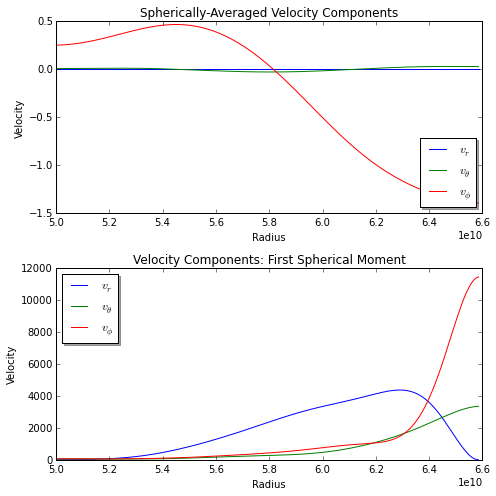

In [11]:
%matplotlib inline
sizetuple = (7,7)
fig, ax = plt.subplots(nrows=2, ncols =1, figsize=sizetuple)

ax[0].plot(radius,savg[:,0,vr],label=r'$v_r$')
ax[0].plot(radius,savg[:,0,vtheta], label=r'$v_\theta$')
ax[0].plot(radius,savg[:,0,vphi], label=r'$v_\phi$')
ax[0].legend(shadow=True,loc='lower right')
ax[0].set_xlabel('Radius')
ax[0].set_ylabel('Velocity')
ax[0].set_title('Spherically-Averaged Velocity Components')

ax[1].plot(radius,savg[:,1,vr],label=r'$v_r$')
ax[1].plot(radius,savg[:,1,vtheta], label=r'$v_\theta$')
ax[1].plot(radius,savg[:,1,vphi], label=r'$v_\phi$')
ax[1].legend(shadow=True,loc='upper left')
ax[1].set_xlabel('Radius')
ax[1].set_ylabel('Velocity')
ax[1].set_title('Velocity Components: First Spherical Moment')


plt.tight_layout()
plt.show()

Radial Temperature Profile
------------------------------
We might also look at temperature ...

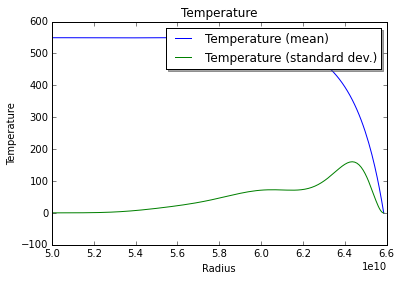

In [15]:
%matplotlib inline
fig, ax = plt.subplots()

ax.plot(radius,savg[:,0,thermal],label='Temperature (mean)')
ax.plot(radius,savg[:,1,thermal]*10, label='Temperature (standard dev.)')
ax.legend(shadow=True,loc='upper right')
ax.set_xlabel('Radius')
ax.set_ylabel('Temperature')
ax.set_title('Temperature')


plt.show()

Heat Flux Contributions
--------------------------
We can also examine the balance between convective and conductive heat flux.  In this case, before plotting these quantities as a function of radius, we normalize them by the surface area of the sphere to form a luminosity.

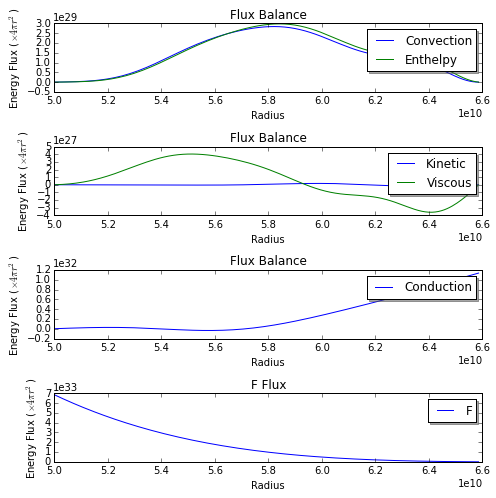

In [17]:
fpr=4.0*numpy.pi*radius*radius
elum = savg[:,0,eflux]*fpr
clum = savg[:,0,cflux]*fpr
enthlum = savg[:,0,enthflux]*fpr
kelum = savg[:,0,keflux]*fpr
viscelum = savg[:,0,viscflux]*fpr
ftwilelum = savg[:,0,ftwil]*fpr
# tlum = elum+clum

fig, ax = plt.subplots(nrows=4, ncols =1, figsize=sizetuple)

ax[0].plot(radius,elum,label='Convection')
# ax.plot(radius,tlum, label='Total')
ax[0].plot(radius,enthlum, label='Enthelpy')
ax[0].set_title('Flux Balance')
ax[0].set_ylabel(r'Energy Flux ($\times 4\pi r^2$)')
ax[0].set_xlabel('Radius')
ax[0].legend(shadow=True)

ax[1].plot(radius,kelum, label='Kinetic')
ax[1].plot(radius,viscelum, label='Viscous')
ax[1].set_title('Flux Balance')
ax[1].set_ylabel(r'Energy Flux ($\times 4\pi r^2$)')
ax[1].set_xlabel('Radius')
ax[1].legend(shadow=True)

ax[2].plot(radius,clum, label='Conduction')
ax[2].set_title('Flux Balance')
ax[2].set_ylabel(r'Energy Flux ($\times 4\pi r^2$)')
ax[2].set_xlabel('Radius')
ax[2].legend(shadow=True)

ax[3].plot(radius,ftwilelum, label='F')
ax[3].set_title('F Flux')
ax[3].set_ylabel(r'Energy Flux ($\times 4\pi r^2$)')
ax[3].set_xlabel('Radius')
ax[3].legend(shadow=True)

plt.tight_layout()
plt.show()

VI.  Azimuthal Averages
=============


**Summary:**    Azimuthal averages of requested output variables.  Each output variable is stored as a 2-D function of radius and latitude.

**Subdirectory:**  AZ_Avgs

**main_input prefix:** azavg

**Python Class:** AZ_Avgs

**Additional Namelist Variables:**  
None

Azimuthally-Averaged outputs are particularly useful for examining a system's mean flows (i.e., differential rotation and meridional circulation). 

Examining the *main_input* file, we see that the following output values have been denoted for the Azimuthal Averages (see *rayleigh_output_variables.pdf* for mathematical formulae):


| Menu Code  | Description |
|------------|-------------|
| 1          | Radial Velocity |
| 2          | Theta Velocity |
| 3          | Phi Velocity  |
| 201        | Radial Mass Flux |
| 202        | Theta Mass Flux |
| 501        | Temperature Perturbation |



In the example that follows, we demonstrate how to plot azimuthal averages, including how to generate streamlines of mass flux.   Note that since the benchmark is Boussinesq, our velocity and mass flux fields are identical.  This is not the case when running an anelastic simulation.

We begin with the usual preamble and also import two helper routines used for displaying azimuthal averages.

Examining the data structure, we see that the vals array is dimensioned to account for latitudinal variation, and that we have new attributes costheta and sintheta used for referencing locations in the theta direction.

In [ ]:
from rayleigh_diagnostics import AZ_Avgs, build_file_list, plot_azav, streamfunction
import matplotlib.pyplot as plt
import pylab
import numpy
#from azavg_util import *
files = build_file_list(70000,80000,path='AZ_Avgs')
az = AZ_Avgs(files[0],path='')
# help(az)

***
Before creating our plots, let's time-average over the last two files that were output (thus sampling the equilibrated phase).

In [ ]:
nfiles = len(files)
tcount=0
for i in range(nfiles):
    az=AZ_Avgs(files[i],path='')

    if (i == 0):
        nr = az.nr
        ntheta = az.ntheta
        nq = az.nq
        azavg=numpy.zeros((ntheta,nr,nq),dtype='float64')

    for j in range(az.niter):
        azavg[:,:,:] += az.vals[:,:,:,j]
        tcount+=1
azavg = azavg*(1.0/tcount)  # Time steps were uniform for this run, so a simple average will suffice

lut = az.lut
vr = azavg[:,:,lut[1]]
vtheta = azavg[:,:,lut[2]]
vphi = azavg[:,:,lut[3]]
rhovr = azavg[:,:,lut[201]]
rhovtheta = azavg[:,:,lut[202]]
temperature = azavg[:,:,lut[501]]
radius = az.radius
costheta = az.costheta
sintheta = az.sintheta

Before we render, we need to do some quick post-processing:
1. Remove the spherical mean temperature from the azimuthal average.
2. Convert v_phi into omega
3. Compute the magnitude of the mass flux vector
4. Compute stream function associated with the mass flux field

In [ ]:
#Subtrace the ell=0 component from temperature at each radius
for i in range(nr):
    temperature[:,i]=temperature[:,i] - numpy.mean(temperature[:,i])

#Convert v_phi to an Angular velocity
omega=numpy.zeros((ntheta,nr))
for i in range(nr):
    omega[:,i]=vphi[:,i]/(radius[i]*sintheta[:])

#Generate a streamfunction from rhov_r and rhov_theta
psi = streamfunction(rhovr,rhovtheta,radius,costheta,order=0)
#contours of mass flux are overplotted on the streamfunction PSI
rhovm = numpy.sqrt(rhovr**2+rhovtheta**2)*numpy.sign(psi)    

Finally, we render the azimuthal averages.  
**NOTE:**  If you want to save any of these figures, you can mimic the saveplot logic at the bottom of this example.

In [ ]:
#   We do a single row of 3 images 
#   Spacing is default spacing set up by subplot
%matplotlib inline
figdpi=300
sizetuple=(5.5*3,3*3)


tsize = 20     # title font size
cbfsize = 10   # colorbar font size
fig, ax = plt.subplots(ncols=3,figsize=sizetuple,dpi=figdpi)
plt.rcParams.update({'font.size': 14})

#temperature
#ax1 = f1.add_subplot(1,3,1)
units = '(nondimensional)'
plot_azav(fig,ax[0],temperature,radius,costheta,sintheta,mycmap='RdYlBu_r',boundsfactor = 2, 
          boundstype='rms', units=units, fontsize = cbfsize)
ax[0].set_title('Temperature',fontsize=tsize)

#Differential Rotation
#ax1 = f1.add_subplot(1,3,2)
units = '(nondimensional)'
plot_azav(fig,ax[1],omega,radius,costheta,sintheta,mycmap='RdYlBu_r',boundsfactor = 1.5, 
          boundstype='rms', units=units, fontsize = cbfsize)
ax[1].set_title(r'$\omega$',fontsize=tsize)

#Mass Flux
#ax1 = f1.add_subplot(1,3,3)
units = '(nondimensional)'
plot_azav(fig,ax[2],psi,radius,costheta,sintheta,mycmap='RdYlBu_r',boundsfactor = 1.5, 
          boundstype='rms', units=units, fontsize = cbfsize, underlay = rhovm)
ax[2].set_title('Mass Flux',fontsize = tsize)

saveplot=False
if (saveplot):
    p.savefig(savefile)  
else:
    plt.show()


VII.  Simulation Slices 
============

VII.1  Equatorial Slices
--------------------------

**Summary:**    2-D profiles of selected output variables in the equatorial plane. 

**Subdirectory:**  Equatorial_Slices

**main_input prefix:** equatorial

**Python Class:** Equatorial_Slices

**Additional Namelist Variables:**  
None

The equatorial-slice output type allows us to examine how the fluid properties vary in longitude and radius.

Examining the *main_input* file, we see that the following output values have been denoted for the Equatorial Slices (see *rayleigh_output_variables.pdf* for mathematical formulae):


| Menu Code  | Description |
|------------|-------------|
| 1          | Radial Velocity |
| 2          | Theta Velocity |
| 3          | Phi Velocity  |




In the example that follows, we demonstrate how to create a 2-D plot of radial velocity in the equatorial plane (at a single time step).

We begin with the usual preamble.  Examining the data structure, we see that the *vals* array is dimensioned to account for longitudinal variation, and that we have the new coordinate attribute *phi*.

In [ ]:
from rayleigh_diagnostics import Equatorial_Slices
import numpy
import matplotlib.pyplot as plt
from matplotlib import ticker, font_manager
istring = '00080000'
es = Equatorial_Slices(istring)
tindex =1 # Grab second time index from this file
# help(es)

In [ ]:
################################
# Equatorial Slice 
#Set up the grid
%matplotlib inline

remove_mean = True # Remove the m=0 mean
nr = es.nr
nphi = es.nphi
r = es.radius/numpy.max(es.radius)
phi = numpy.zeros(nphi+1,dtype='float64')
phi[0:nphi] = es.phi
phi[nphi] = numpy.pi*2  # For display purposes, it is best to have a redunant data point at 0,2pi

#We need to generate a cartesian grid of x-y coordinates (both X & Y are 2-D)
radius_matrix, phi_matrix = numpy.meshgrid(r,phi)
X = radius_matrix * numpy.cos(phi_matrix)
Y = radius_matrix * numpy.sin(phi_matrix)

qindex = es.lut[1] # radial velocity
field = numpy.zeros((nphi+1,nr),dtype='float64')
field[0:nphi,:] =es.vals[:,:,qindex,tindex]
field[nphi,:] = field[0,:]  #replicate phi=0 values at phi=2pi

#remove the mean if desired (usually a good idea, but not always)
if (remove_mean):
    for i in range(nr):
        the_mean = numpy.mean(field[:,i])
        field[:,i] = field[:,i]-the_mean

#Plot
sizetuple=(8,5)
fig, ax = plt.subplots(figsize=(8,8))
tsize = 20     # title font size
cbfsize = 10   # colorbar font size
img = ax.pcolormesh(X,Y,field,cmap='jet')
ax.axis('equal')  # Ensure that x & y axis ranges have a 1:1 aspect ratio
ax.axis('off')    # Do not plot x & y axes

# Plot bounding circles
ax.plot(r[nr-1]*numpy.cos(phi), r[nr-1]*numpy.sin(phi), color='black')  # Inner circle
ax.plot(r[0]*numpy.cos(phi), r[0]*numpy.sin(phi), color='black')  # Outer circle

ax.set_title(r'$v_r$', fontsize=20)

#colorbar ...
cbar = plt.colorbar(img,orientation='horizontal', shrink=0.5, aspect = 15, ax=ax)
cbar.set_label('nondimensional')
        
tick_locator = ticker.MaxNLocator(nbins=5)
cbar.locator = tick_locator
cbar.update_ticks()
cbar.ax.tick_params(labelsize=cbfsize)   #font size for the ticks

t = cbar.ax.xaxis.label
t.set_fontsize(cbfsize)  # font size for the axis title


plt.tight_layout()
plt.show()

VII.2  Meridional Slices
--------------------------

**Summary:**    2-D profiles of selected output variables sampled in meridional planes. 

**Subdirectory:**  Meridional_Slices

**main_input prefix:** meridional

**Python Class:** Meridional_Slices

**Additional Namelist Variables:**  

* meridional_indices (indicial) : indices along longitudinal grid at which to output meridional planes.

* meridional_indices_nrm (normalized) : normalized longitudinal grid coordinates at which to output


The meridional-slice output type allows us to examine how the fluid properties vary in latitude and radius.

Examining the *main_input* file, we see that the following output values have been denoted for the Meridional Slices (see *rayleigh_output_variables.pdf* for mathematical formulae):


| Menu Code  | Description |
|------------|-------------|
| 1          | Radial Velocity |
| 2          | Theta Velocity |
| 3          | Phi Velocity  |




In the example that follows, we demonstrate how to create a 2-D plot of radial velocity in a meridional plane.  The procedure is similar to that used to plot an azimuthal average.


We begin with the usual preamble and import the *plot_azav* helper function.  Examining the data structure, we see that it is similar to the AZ_Avgs data structure.  The *vals* array possesses an extra dimension relative to its AZ_Avgs counterpart to account for the multiple longitudes that may be output, we see attributes *phi* and *phi_indices* have been added to reference the longitudinal grid.  

In [ ]:
#####################################
#  Meridional Slice
from rayleigh_diagnostics import Meridional_Slices, plot_azav
import numpy
import matplotlib.pyplot as plt
from matplotlib import ticker, font_manager
# Read the data

istring = '00140000'
ms = Meridional_Slices(istring)
tindex =1 # All example quantities were output with same cadence.  Grab second time-index from all.
# help(ms)

In [ ]:

radius = ms.radius
costheta = ms.costheta
sintheta = ms.sintheta
phi_index = 0  # We only output one Meridional Slice
vr_ms = ms.vals[phi_index,:,:,ms.lut[1],tindex]
units = 'nondimensional'

# Plot
sizetuple=(8,5)
fig, ax = plt.subplots(figsize=(8,8))
tsize = 20     # title font size
cbfsize = 10   # colorbar font size
ax.axis('equal')  # Ensure that x & y axis ranges have a 1:1 aspect ratio
ax.axis('off')    # Do not plot x & y axes
plot_azav(fig,ax,vr_ms,radius,costheta,sintheta,mycmap='RdYlBu_r',boundsfactor = 4.5, 
          boundstype='rms', units=units, fontsize = cbfsize)
ax.set_title('Radial Velocity',fontsize=tsize)
plt.tight_layout()
plt.show()

VII.3  Shell Slices
--------------------------

**Summary:**    2-D, spherical profiles of selected output variables sampled in at discrete radii. 

**Subdirectory:**  Shell_Slices

**main_input prefix:** shellslice

**Python Class:** Shell_Slices

**Additional Namelist Variables:**  

* shellslice_levels (indicial) : indices along radial grid at which to output spherical surfaces.

* shellslice_levels_nrm (normalized) : normalized radial grid coordinates at which to output spherical surfaces.


The shell-slice output type allows us to examine how the fluid properties vary on spherical surfaces.

Examining the *main_input* file, we see that the following output values have been denoted for the Shell Slices (see *rayleigh_output_variables.pdf* for mathematical formulae):


| Menu Code  | Description |
|------------|-------------|
| 1          | Radial Velocity |
| 2          | Theta Velocity |
| 3          | Phi Velocity  |




In the examples that follow, we demonstrate how to create a 2-D plot of radial velocity:
* on a Cartesian, lat-lon grid
* projected onto a spherical surface using Basemap   (MUST set use Basemap=True below)



Plotting on a lat-lon grid is straightforward and illustrated below.   The shell-slice data structure is also displayed via the help() function in the example below and contains information needed to define the spherical grid for plotting purposes.

It is worth noting the *slice_spec* keyword (described in the docstring) that can be passed to the init method.  When reading large shell slices, a user can save time and memory during the read process by specifying the slice they want to read.

In [ ]:
#####################################
#  Shell Slice
from rayleigh_diagnostics import Shell_Slices
import numpy
import matplotlib.pyplot as plt
from matplotlib import ticker, font_manager
# Read the data
%matplotlib inline

istring = '00140000'
ss = Shell_Slices(istring)
# help(ss)
ntheta = ss.ntheta
nphi = ss.nphi
costheta = ss.costheta
theta = numpy.arccos(costheta)

#help(ss)
tindex =1 # All example quantities were output with same cadence.  Grab second time-index from all.
rindex = 0 # only output one radius
sizetuple=(8,8)

vr = ss.vals[:,:,rindex,ss.lut[3],tindex]
fig, ax = plt.subplots(figsize=sizetuple)


img = plt.imshow(numpy.transpose(vr), extent=[0,360,-90,90])
ax.set_xlabel( 'Longitude')
ax.set_ylabel( 'Latitude')
ax.set_title(  'Radial Velocity')

plt.tight_layout()
plt.show()

**Plotting with Basemap**
If you wish to project your data onto a spherical grid, we recommend using the [Basemap](https://matplotlib.org/basemap/) package.
If you have not installed this package yet, recall that you can do so by activating your conda environment and then running:  
    **conda install -c intel basemap**
    
The example that follows illustrates how to use Basemap.   So that this notebook will run for those without Basemap installed, we have nested the plotting code in a try/except statement.  If Basemap fails to import, the code will report an error message instead of crashing.

In [ ]:
try: 
    from mpl_toolkits.basemap import Basemap, addcyclic
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib import ticker
    from rayleigh_diagnostics import Shell_Slices

    %matplotlib inline
    tsize = 20     # title font size
    cbfsize = 10   # colorbar font size

    #Specify which data to plot
    istring='00140000'
    rec_spec = [1,1,0]  # grab time index 1, quantity code 1, and radial index 0  
    ss = Shell_Slices(istring,slice_spec = rec_spec)
    nphi = ss.nphi
    ntheta = ss.ntheta

    save_figure = False # Set to true to save to a figure_file (below)
    figure_file = 'shell_slice_basemap.png'

    #The resolution of the png file or the view window in pixels
    xpixels = 1024  
    ypixels = 1024

    # Initialize the projection.
    # lon_0, lat_0 are the center point of the projection.
    # resolution = 'l' means use low resolution coastlines.
    m = Basemap(projection='ortho',lon_0=-20,lat_0=35,resolution='l')


    #Read in the data

    data = ss.vals[:,:,0,0,0].reshape(nphi,ntheta)
    data = np.transpose(data)
    maxabs = 3*np.std(data)  # saturate data at +/- 3 sigma
    dlon = 360.0/(nphi)
    dlat = 180.0/ntheta

    #Scale the data
    for i in range(ntheta):
        for j in range(nphi):
            if (data[i,j] > maxabs):
                data[i,j] = maxabs
            if (data[i,j] < -maxabs):
                data[i,j] = -maxabs
            data[i,j] = data[i,j]/maxabs 


    #Generate 1-D grids of latitude and longitude
    lons = np.zeros(nphi)
    for i in range(nphi):
        lons[i] = dlon*i-180.0

    lats = np.zeros(ntheta)
    for i in range(ntheta):
        lats[i] = 90.0-np.arccos(ss.costheta[i])*180.0/np.pi
        lats[i] = i*dlat-90


    # Convert to 2-D grids
    llons, llats = np.meshgrid(lons, lats)

    # Get x-y projection points on the plane
    x, y = m(llons, llats)

    # Do some interpolation 
    # This is necessary for moderately-sized and large shell slices (ell_max >= 255)
    nx = int((m.xmax-m.xmin)/2000.)+1; ny = int((m.ymax-m.ymin)/2000.)+1
    nx = 1024
    ny = 1024
    print('interpolating...')
    topodat,x,y =\
    m.transform_scalar(data,lons,lats,nx,ny,returnxy=True,masked=True,order=1)
    print ('...complete...')

    #Initialize the window
    plt.figure(figsize=(xpixels/100.0, ypixels/100.0))

    #View the data
    my_cmap = plt.cm.RdYlBu_r
    img=m.pcolormesh(x,y,topodat,cmap=my_cmap)

    # draw parallels and meridians.
    m.drawparallels(np.arange(-90.,120.,30.))
    m.drawmeridians(np.arange(0.,420.,60.))
    m.drawmapboundary(fill_color='white')

    #colorbar ...
    cbar = m.colorbar(img) # ,shrink=0.5, aspect = 15)
    cbar.set_label('nondimensional')

    tick_locator = ticker.MaxNLocator(nbins=5)
    cbar.locator = tick_locator
    cbar.update_ticks()
    cbar.ax.tick_params(labelsize=cbfsize)   #font size for the ticks

    t = cbar.ax.xaxis.label
    t.set_fontsize(cbfsize)  # font size for the axis title

    plt.title('Radial Velocity')

    if (save_figure):
        plt.savefig(figure_file, fontsize=tsize)
    else:
        plt.show()
except:
    print('Basemap module is not installed.')

VIII.  Spherical Harmonic Spectra
===================

**Summary:**    Spherical Harmonic Spectra sampled at discrete radii. 

**Subdirectory:**  Shell_Spectra

**main_input prefix:** shellspectra

**Python Classes:** 

* Shell_Spectra :  Complete data structure associated with Shell_Spectra outputs.
* PowerSpectrum :  Reduced data structure -- contains power spectrum of velocity and/or magnetic fields only.

**Additional Namelist Variables:**  

* shellspectra_levels (indicial) : indices along radial grid at which to output spectra.

* shellspectra_levels_nrm (normalized) : normalized radial grid coordinates at which to output spectra.


The shell-spectra output type allows us to examine the spherical harmonic decomposition of output variables at discrete radii.

Examining the *main_input* file, we see that the following output values have been denoted for the Shell Spectra (see *rayleigh_output_variables.pdf* for mathematical formulae):


| Menu Code  | Description |
|------------|-------------|
| 1          | Radial Velocity |
| 2          | Theta Velocity |
| 3          | Phi Velocity  |



Spherical harmonic spectra can be read into Python using either the **Shell_Spectra** or **PowerSpectrum** classes.  

The **Shell_Spectra** class provides the full complex spectra, as a function of degree ell and azimuthal order m, for each specified output variable.   It possesses an attribute named *lpower* that contains the associated power for each variable, along with its m=0 contributions separated and removed.

The **Power_Spectrum** class can be used to read a Shell_Spectra file and quickly generate a velocity or magnetic-field power spectrum.   For this class to work correctly, your file must contain all three components of either the velocity or magnetic field.   Other variables are ignored (use Shell_Spectrum's lpower for those).

We illustrate how to use these two classes below.  As usual, we call the help() function to display the docstrings that describe the different data structures embodied by each class.

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy
from rayleigh_diagnostics import Shell_Spectra, Power_Spectrum
istring = '00140000'

%matplotlib inline

tind = 0
rind = 0
#help(ss)

vpower = Power_Spectrum(istring)
# help(vpower)
power = vpower.power

fig, ax = plt.subplots(nrows=3, figsize=(6,6))
ax[0].plot(power[:,rind,tind,0])
ax[0].set_xlabel(r'Degree $\ell$')
ax[0].set_title('Velocity Power (total)')


ax[1].plot(power[:,rind,tind,1])
ax[1].set_xlabel(r'Degree $\ell$')
ax[1].set_title('Velocity Power (m=0)')

ax[2].plot(power[:,rind,tind,2])
ax[2].set_xlabel(r'Degree $\ell$')
ax[2].set_title('Velocity Power ( total - {m=0} )')

plt.tight_layout()
plt.show()

fig, ax = plt.subplots()
ss = Shell_Spectra(istring)
# help(ss)
mmax = ss.mmax
lmax = ss.lmax
power_spectrum = numpy.zeros((lmax+1,mmax+1),dtype='float64')

for i in range(1,4):   # i takes on values 1,2,3
    qind=ss.lut[i]
    complex_spectrum = ss.vals[:,:,rind,qind,tind]
    power_spectrum = power_spectrum+numpy.real(complex_spectrum)**2 + numpy.imag(complex_spectrum)**2

power_spectrum = numpy.transpose(power_spectrum)

tiny = 1e-6
img=ax.imshow(numpy.log10(power_spectrum+tiny), origin='lower')
ax.set_ylabel('Azimuthal Wavenumber m')
ax.set_xlabel(r'Degree $\ell$')
ax.set_title('Velocity Power Spectrum')

#colorbar ...
cbar = plt.colorbar(img) # ,shrink=0.5, aspect = 15)
cbar.set_label('Log Power')
        
tick_locator = ticker.MaxNLocator(nbins=5)
cbar.locator = tick_locator
cbar.update_ticks()
cbar.ax.tick_params()   #font size for the ticks


plt.show()



IX.  Point Probes
============

**Summary:**    Point-wise sampling of desired output variables.

**Subdirectory:**  Point_Probes

**main_input prefix:** point_probe

**Python Class:**  Point_Probes 


**Additional Namelist Variables:**  

* point_probe_r  : radial indices for point-probe output

* point_probe_theta  : theta indices for point-probe output

* point_probe_phi : phi indices for point-probe output

* point_probe_r_nrm  : normalized radial coordinates for point-probe output

* point_probe_theta_nrm : normalized theta coordinates for point-probe output

* point_probe_phi_nrm : normalized phi coordinates for point-probe output

* point_probe_cache_size : number of time-samples to save before accessing the disk 


Point-probes allow us to sample a simulation at an arbitrary set of points.  This output type serves two purposes:
1.  It provides an analog to laboratory measurements where slicing and averaging are difficult, but taking high-time-cadence using (for example) thermistors is common-practice.
2.  It provides an alternative method of slicing a model ( for when equatorial, meridional, or shell slices do yield the desired result).

IX.1  Specifying Point-Probe Locations
---------

Point-probe locations are indicated by specifying a grid.   The user does not supply a set of ordered coordinates (r,theta,phi).  Instead, the user specifies nodes on the grid using the namelist variables described above.   Examples follow.

**Example 1:  4-point Coarse Grid **

point_probe_r_nrm = 0.25, 0.5  
point_probe_theta_nrm = 0.5  
point_probe_phi_nrm = 0.2, 0.8

This example would produce point probes at the four coordinates  { (0.25, 0.5, 0.2), (0.25, 0.5, 0.8), (0.5, 0.5, 0.2), (0.5,0.5,0.8) }   (r,theta,phi; normalized coordinates).

**Example 2:  "Ring" in Phi **

point_probe_r_nrm = 0.5  
point_probe_theta_nrm = 0.5  
point_probe_phi_nrm = 0.0, -1.0

This example describes a ring in longitude, sampled at mid-shell, in the equatorial plane.  We have made use of the positional range feature here by indicating normalized phi coordinates of 0.0, -1.0.  Rayleigh intreprets this as an instruction to sample all phi coordinates.

** Example 3: 2-D Surface in (r,phi)  **

point_probe_r_nrm = 0, -1.0  
point_probe_theta_nrm = 0.25  
point_probe_phi_nrm = 0, -1.0

This example uses the positional range feature along with normalized coordinates to generate a 2-D slice in r-phi at theta = 45 degrees (theta_nrm = 0.25).  Using the syntax 0,-1.0 instructs *Rayleigh* to grab all r and phi coordinates.

** Example 4:  3-D Meridional "Wedges" **

point_probe_r_nrm = 0.0, -1.0  
point_probe_theta_nrm =  0.0, -1.0  
point_probe_phi_nrm =  0.20, -0.30, 0.7, -0.8

This example generates two 3-D wedges described by all r,theta points and all longitudes in the ranges [72 deg, 108 deg]  and [252 deg, 288 deg].

IX.2  Point-Probe Caching
-----------------------------

When performing sparse spatial sampling using point-probes, it may be desireable to output with a high-time cadence.  As this may cause disk-access patterns characterized by frequent, small writes, the point-probes are programmed with a caching feature.  This feature is activated by specifing the **point_probe_cache_size** variable in the output namelist.

This variable determines how many time-samples are saved in memory before a write is performed.  Its default value is 1, which means that the disk is accessed with a frequency of **point_probe_frequency**.  If the cache size is set to 10 (say), then samples are still peformed at **point_probe_frequency** but they are only written to disk after 10 have been collected in memory.   

**NOTE:**  Be sure that **point_probe_cache_size** divides evenly into **point_probe_nrec**.


IX.3  Example:  Force-Balance with Point Probes
-------------------------------------------------------

Our example input file specifies a coarse, six-point grid.  Examining the *main_input* file, we see that all variables necessary to examine the force balance in each direction have been specified. (see *rayleigh_output_variables.pdf* for mathematical formulae):


| Menu Code  | Description |
|------------|-------------|
| 1          | Radial Velocity |
| 2          | Theta Velocity |
| 3          | Phi Velocity  |
| 1201       | Radial Advection (v dot grad v) |
| 1202       | Theta Advection |
| 1203       | Phi Advection  |
| 1216          | Buoyancy Force (ell=0 component subtracted) |
| 1219  | Radial Coriolis Force |
| 1220  | Theta Coriolis Force  |
| 1221  | Phi Coriolis Force |
| 1228  | Radial Viscous Force |
| 1229  | Theta Viscous Force  |
| 1230  | Phi Viscous Force|


**Note that the pressure force appears to be missing.** This is not an oversight.  The diagnostic nature of the Pressure equation in incompressible/anelastic models, coupled with the second-order Crank-Nicolson time-stepping scheme, means that the pressure field can exhibit an even/odd sawtoothing in time.  The *effective* pressure force (as implemented through the Crank-Nicolson scheme) is always a weighted average over two time steps **and is always well-resolved in time**.  

When sampling at regular intervals as we have here, if we directly sample the pressure force, we will sample either the high or low end of the sawtooth envelope, and the force balance will be off by a large factor.  The easiest fix is to output the velocity field and compute its time derivative.  This, in tandem with the sum of all other forces, can be used to calculate the effective pressure as a post-processing step.  The (undesireable)  alternative is to output once every time step and compute the effective pressure using the Crank-Nicolson weighting.    

We demonstrate how to compute the effective pressure force via post-processing in the example below.

In [ ]:
from rayleigh_diagnostics import Point_Probes,  build_file_list
import numpy
from matplotlib import pyplot as plt

%matplotlib inline

#Decide which direction you want to look at (set direction = {radial,theta, or phi})
#This is used to determine the correct quantity codes below
radial = 0
theta  = 1
phi    = 2
direction=radial
# Build a list of all files ranging from iteration 0 million to 1 million
files = build_file_list(0,1000000,path='Point_Probes')
nfiles = len(files)-1


for i in range(nfiles):
    pp = Point_Probes(files[i],path='')
    if (i == 0):
        nphi = pp.nphi
        ntheta = pp.ntheta
        nr = pp.nr
        nq = pp.nq
        niter = pp.niter
        vals=numpy.zeros( (nphi,ntheta,nr,nq,niter*nfiles),dtype='float64')
        time=numpy.zeros(niter*nfiles,dtype='float64')
    vals[:,:,:,:, i*niter:(i+1)*niter] = pp.vals
    time[i*niter:(i+1)*niter]=pp.time
istring='00140000' # iteration to examine
# help(pp)
##################################################
# We choose the coordinate indices **within**
# the Point-Probe array that we want to examine
# These indices start at zero and run to n_i-1
# where n_i is the number of points sampled in 
# the ith direction

# Use help(pp) after loading the Point-Probe file
# to see the Point-Probe class structure

pind = 0           # phi-index to examine
rind = 0           # r-index to examine
tind = 0           # theta-index to examine


pp   = Point_Probes(istring)
lut  = pp.lut

nt   = pp.niter


#######################################################################
#  Grab velocity from the point probe data
u  = vals[pind,0,rind,pp.lut[1+direction],:]
dt=time[1]-time[0]


###########################################################################
# Use numpy to compute time-derivative of u
# (necessary to compute a smooth effective pressure without outputing every timestep)

#Depending on Numpy version, gradient function takes either time (array) or dt (scalar)
try:
    dudt = numpy.gradient(u,time)
except:
    dt = time[1]-time[0]  # Assumed to be constant...
    dudt = numpy.gradient(u,dt) 



################################################################
#      Forces (modulo pressure)
# Note the minus sign for advection.  Advective terms are output as u dot grad u, not -u dot grad u
advec = -vals[ pind, tind, rind, lut[1201 + direction], :] 
cor   = vals[ pind, tind, rind, lut[1219 + direction], :]
visc  = vals[ pind, tind, rind, lut[1228 + direction], :]
forces = visc+cor+advec
if (direction == radial):
    buoy  = vals[ pind, tind, rind, lut[1216], :]
    forces = forces+buoy


############################################3
# Construct effective pressure force
pres = dudt-forces
forces = forces+pres
############################################################
# Set up the plot
yfsize='xx-large'  # size of y-axis label

ustrings = [r'u_r', r'u_\theta', r'u_\phi']
ustring=ustrings[direction]
dstring = r'$\frac{\partial '+ustring+'}{\partial t}$'
fstrings = [r'$\Sigma\,F_r$' , r'$\Sigma\,F_\theta$' , r'$\Sigma\,F_\phi$' ]
fstring = fstrings[direction]
diff_string = dstring+' - '+fstring

pstring = 'pressure'
cstring = 'coriolis'
vstring = 'viscous'
bstring = 'buoyancy'
fig, axes = plt.subplots(nrows=2, figsize=(7*2.54, 9.6))
ax0 = axes[0]
ax1 = axes[1]


########################################
# Upper: dur/dt and F_total
#mpl.rc('xtick', labelsize=20) --- still trying to understand xtick label size etc.
#mpl.rc('ytick', labelsize=20)

ax0.plot(time,forces, label = fstring)
ax0.plot(time,pres,label=pstring)
ax0.plot(time,cor,label=cstring)
ax0.plot(time,visc,label=vstring)
if (direction == radial):
    ax0.plot(time,buoy,label=bstring)
ax0.set_xlabel('Time', size=yfsize)

ax0.set_ylabel('Acceleration', size=yfsize)
ax0.set_title('Equilibration Phase',size=yfsize)
ax0.set_xlim([0,0.1])
leg0 = ax0.legend(loc='upper right', shadow=True, ncol = 1, fontsize=yfsize) 

##########################################
# Lower:  Numpy Gradient Approach
ax1.plot(time,forces,label=fstring)
ax1.plot(time,pres,label=pstring)
ax1.plot(time,cor,label=cstring)
ax1.plot(time,visc,label=vstring)
if (direction == radial):
    ax1.plot(time,buoy,label=bstring)
ax1.set_title('Late Evolution',size=yfsize)
ax1.set_xlabel('Time',size=yfsize)
ax1.set_ylabel('Acceleration', size =yfsize)
ax1.set_xlim([0.2,4])
leg1 = ax1.legend(loc='upper right', shadow=True, ncol = 1, fontsize=yfsize)


plt.tight_layout()
plt.show()


X.  Modal Outputs
========


**Summary:**    Spherical Harmonic Spectral Coefficients sampled at discrete radii and degree ell. 

**Subdirectory:**  SPH_Modes

**main_input prefix:** sph_mode

**Python Classes:** SPH_Modes



**Additional Namelist Variables:**  

* sph_mode_levels (indicial) : indices along radial grid at which to output spectral coefficients.

* sph_mode_levels_nrm (normalized) : normalized radial grid coordinates at which to output spectral coefficients.

* sph_mode_ell : Comma-separated list of spherical harmonic degree ell to output.


The Modal output type allows us to output a restricted set of complex spherical harmonic coefficients at discrete radii.  For each specified ell-value, all associated azimuthal wavenumbers are output.

This output can be useful for storing high-time-cadence spectral data for a few select modes.  In the example below, we illustrate how to read in this output type, and we plot the temporal variation of the real and complex components of radial velocity for mode ell = 4, m = 4.


Examining the *main_input* file, we see that the following output values have been denoted for the Shell Spectra (see *rayleigh_output_variables.pdf* for mathematical formulae):


| Menu Code  | Description |
|------------|-------------|
| 1          | Radial Velocity |
| 2          | Theta Velocity |
| 3          | Phi Velocity  |

We also see that ell=2,4,8 have been selected in the *main_input* file, leading to power at the following modes:

|ell-value | m-values |
|----------|---------------|
| 2        | 0,1,2 |
| 4        | 0,1,2,3,4 |
| 8        | 0,1,2,3,4,5,6,7,8 |



In [ ]:
from rayleigh_diagnostics import SPH_Modes, build_file_list
import matplotlib.pyplot as plt
import numpy

qind = 1  # Radial velocity
rind = 0  # First radius stored in file


files = build_file_list(0,1000000,path='SPH_Modes')
nfiles = len(files)
for i in range(nfiles):
    spm = SPH_Modes(files[i],path='')
    if (i == 0):
        nell = spm.nell
        nr = spm.nr
        nq = spm.nq
        niter = spm.niter
        lvals = spm.lvals
        max_ell = numpy.max(lvals)
        nt = niter*nfiles
        vr = spm.lut[qind]
        vals=numpy.zeros( (max_ell+1,nell,nr,nq,nt),dtype='complex64')
        time=numpy.zeros(nt,dtype='float64')
    vals[:,:,:,:, i*niter:(i+1)*niter] = spm.vals
    time[i*niter:(i+1)*niter]=spm.time
help(spm)
#####################################################3
# Print some information regarding the bookkeeping
print('...........')
print(' Contents')
print('  nr = ', nr)
print('  nq = ', nq)
print('  nt = ', nt)
for i in range(nell):
    lstring=str(lvals[i])
    estring = 'Ell='+lstring+' Complex Amplitude : vals[0:'+lstring+','+str(i)+',0:nr-1,0:nq-1,0:nt-1]'
    print(estring)
print(' First dimension is m-value.')
print('...........')

######################################
# Create a plot of the ell=4, m=4 real and imaginary amplitudes
radius = spm.radius[rind]
lfour_mfour = vals[4,1,rind,vr,:]
fig, ax = plt.subplots()
ax.plot(time,numpy.real(lfour_mfour), label='real part')
ax.plot(time,numpy.imag(lfour_mfour), label='complex part')
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')
rstring = "{0:4.2f}".format(radius)
ax.set_title(r'Radial Velocity ( $\ell=4$ , m=4, radius='+rstring+' ) ')
ax.legend(shadow=True)
ax.set_xlim([0.5,4.0])
plt.show()

<h1>Non-dimensional Calculation<h1/>

In [1]:
from rayleigh_diagnostics import ReferenceState, build_file_list
import matplotlib.pyplot as plt
import numpy


# files = build_file_list(0,1000000,path='reference')
b = ReferenceState(filename='', path='reference')

# Print avg values for reference


# rho = sum(b.density, 0.0) / len(b.density)
# temper = sum(b.temperature, 0.0) / len(b.temperature)
# g = sum(b.gravity,0.0) / len(b.gravity)

# print('density: ' + str(rho))
# print('Temperature: ' + str(temper))
# print('gravity: ' + str(g))

In [2]:
from rayleigh_diagnostics import Shell_Avgs, build_file_list
import numpy as np

# Build a list of all files ranging from iteration 0 million to 1 million
files = build_file_list(0,2000000,path='Shell_Avgs')
a = Shell_Avgs(filename=files[0], path='')

nfiles = len(files)

nr = a.nr
nq = a.nq
nmom = 4
niter = a.niter
radius = a.radius
savg=np.zeros((nr,nmom,nq),dtype='float64')
for i in range(niter):
    savg[:,:,:] += a.vals[:,:,:,i]
savg = savg*(1.0/niter)

lut = a.lut
ftwil = lut[1433] # F twidle for calculations
eflux = lut[1440]  # Convective Heat Flux (radial)
enthflux = lut[1455] # Entholpy Flux (radial)
keflux = lut[1923] # KE Flux (radial)

fpr=4.0*np.pi*radius*radius

ftwilelum = savg[:,0,ftwil]
elum = savg[:,0,eflux]
enthlum = savg[:,0,enthflux]
kelum = savg[:,0,keflux]


# Reverse lists and radius list
ftwarray = ftwilelum[::-1]
revr = radius[::-1]
relum = elum[::-1]
renthlum = enthlum[::-1]
rkelum = kelum[::-1]

# Lower and Upper bound
r1 = 5e10
r2 = 6.58602090e10

<h3>Rayleigh Number<h3/>

In [3]:
# Known constants
nu = 2e12
kappa = 2e12
h = r2-r1
cp = 3.5e8
omega = 2.6e-6

##### Integration Steps

# Check Volume of the sphere(slice) is correct
normaliz = np.trapz(revr**2, revr)
print('Volume: '+ str(4*np.pi*normaliz))

# Solve g-twidle
g = np.trapz(b.gravity*revr**2, revr)/normaliz
print('Gravity: ' + str(g))

# Solve rho-twidle
rho = np.trapz(b.density*revr**2, revr)/normaliz
print('Density: '+ str(rho))

# Solve temperature-twidle
temperature = np.trapz(b.temperature*revr**2, revr)/normaliz
print('Temperature: ' + str(temperature))

# Integrage FQ
fq = (np.trapz(ftwarray*revr**2, revr))/normaliz
print('FQ = '+ str(fq))

# Integrate FL
luminosity = 6.846e33
fl = np.trapz((luminosity/(4*np.pi*revr*revr))*revr**2, revr)/normaliz
print('FL = ' + str(fl))

# Print F-twidle = FL-FQ
print('Ftwidle = ' + str(fl-fq))

# Solve for Rayleigh Number
print()
print()
print('###################################')

ra = (g*(fl-fq)*h**4)/(cp*rho*temperature*nu*kappa**2)
print('ra = ' + str(ra))

Volume: 6.730266530843406e+32
Gravity: 41293.63890900006
Density: 0.08278099015510407
Temperature: 1197265.9233349662
FQ = 42309601225.092224
FL = 161329406965.3931
Ftwidle = 119019805740.30087


###################################
ra = 1120620.974896694


<h3>Nussel Number<h3/>

In [4]:
# Integrate KE Flux
fk = np.trapz(rkelum*revr**2, revr)/normaliz

# Integrate Enthelpy Flux
fe = np.trapz(renthlum*revr**2, revr)/normaliz

# Integrate Convective flux
fc = np.trapz(relum*revr**2, revr)/normaliz

# Print Nussel Number
nussel = (fk+fe+fq)/fl

print('###################################')
print('Nussel = ' + str(nussel))


###################################
Nussel = 0.2622768695946304


<h3>Ekman Number<h3/>

In [6]:
# Ekman Number Equation
ek = nu/(omega*h**2)
print('###################################')
print('Ekman = ' + str(ek))

###################################
Ekman = 0.0030580095383952177


In [20]:
test = np.trapz(revr,revr)
print(test, 0.5*r2**2-0.5*r1**2)

test2 = np.trapz(4*np.pi*revr**2,revr)
print(test2)

test3 = np.trapz(g*revr*revr, revr)/normaliz
print(test3)

9.187835647618405e+20 9.187835647618405e+20
6.730266530843406e+32
40668.437558320555
